In [1]:
#importing libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PolaritySubjectivity import *

In [2]:
df=pd.read_csv('tweet_dataset.csv')
pd.set_option('display.max_colwidth', 100)
df.head()

C:\Users\fcc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,9,10,11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,user_id,has_media,medias,Unnamed: 14,Unnamed: 15
0,0,rj_ashwin,1.243960e+18,"Sabse Pehle toh Majdur , Labour Class, Worker,kehna band Karo Unhe Tum Kya ho jo 'Work from h...",/rj_ashwin/status/1243959777266286593,0,1,0,2020-03-28 23:24:57,False,False,2898096642,NaN,NaN,NaN,NaN
1,1,vikramsoni232,1.244163e+18,@ TajinderBagga Bhaiya i proud of you. You are real hero in delhi in #lockdown21 You moral ...,/vikramsoni232/status/1244163016012075008,0,0,0,2020-03-29 12:52:33,False,False,291596567,NaN,NaN,NaN,NaN
2,2,ABHISHE33329022,1.244291e+18,Mam India mein hum ko company's ki audit krni chiye.wo labour ko pay kre lock down ki salary...,/ABHISHE33329022/status/1244290847236972544,0,0,0,2020-03-29 21:20:30,True,False,1244169861946699776,NaN,NaN,NaN,NaN
3,3,hindust74474485,1.253172e+18,Videsh me rahne wale Bhai India laye Gaye but Jo log India me hi dusre state me fase huye h ...,/hindust74474485/status/1253171675081904129,0,0,0,2020-04-23 09:29:44,False,False,1252876822687019009,NaN,NaN,NaN,NaN
4,4,KumarSa61420257,1.254602e+18,Akhir bhojh ban gaye na bihari pure India pe. Students bhi and Labour bhi.Jab bihari majdur...,/KumarSa61420257/status/1254602420426063872,0,0,0,2020-04-27 08:15:01,False,False,991231687341195266,NaN,NaN,NaN,NaN


In [5]:
# Dropping unnecessary columns

df_clean = df.drop(['Unnamed: 0','Unnamed: 14','Unnamed: 15','medias','has_media','user_id','url','ID'], axis=1)
df_clean.rename(columns={'text':'Tweets'}, inplace=True)
print(df_clean.shape)
df_clean.head()

(74809, 8)


,usernameTweet,Tweets,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet
0,rj_ashwin,"Sabse Pehle toh Majdur , Labour Class, Worker,kehna band Karo Unhe Tum Kya ho jo 'Work from h...",0,1,0,2020-03-28 23:24:57,False,False
1,vikramsoni232,@ TajinderBagga Bhaiya i proud of you. You are real hero in delhi in #lockdown21 You moral ...,0,0,0,2020-03-29 12:52:33,False,False
2,ABHISHE33329022,Mam India mein hum ko company's ki audit krni chiye.wo labour ko pay kre lock down ki salary...,0,0,0,2020-03-29 21:20:30,True,False
3,hindust74474485,Videsh me rahne wale Bhai India laye Gaye but Jo log India me hi dusre state me fase huye h ...,0,0,0,2020-04-23 09:29:44,False,False
4,KumarSa61420257,Akhir bhojh ban gaye na bihari pure India pe. Students bhi and Labour bhi.Jab bihari majdur...,0,0,0,2020-04-27 08:15:01,False,False


In [6]:
df_clean['Subjectivity'] = df_clean['Tweets'].apply(getSubjectivity)
df_clean['Polarity'] = df_clean['Tweets'].apply(getPolarity)
df_clean['Analysis'] = df_clean['Polarity'].apply(getAnalysis)

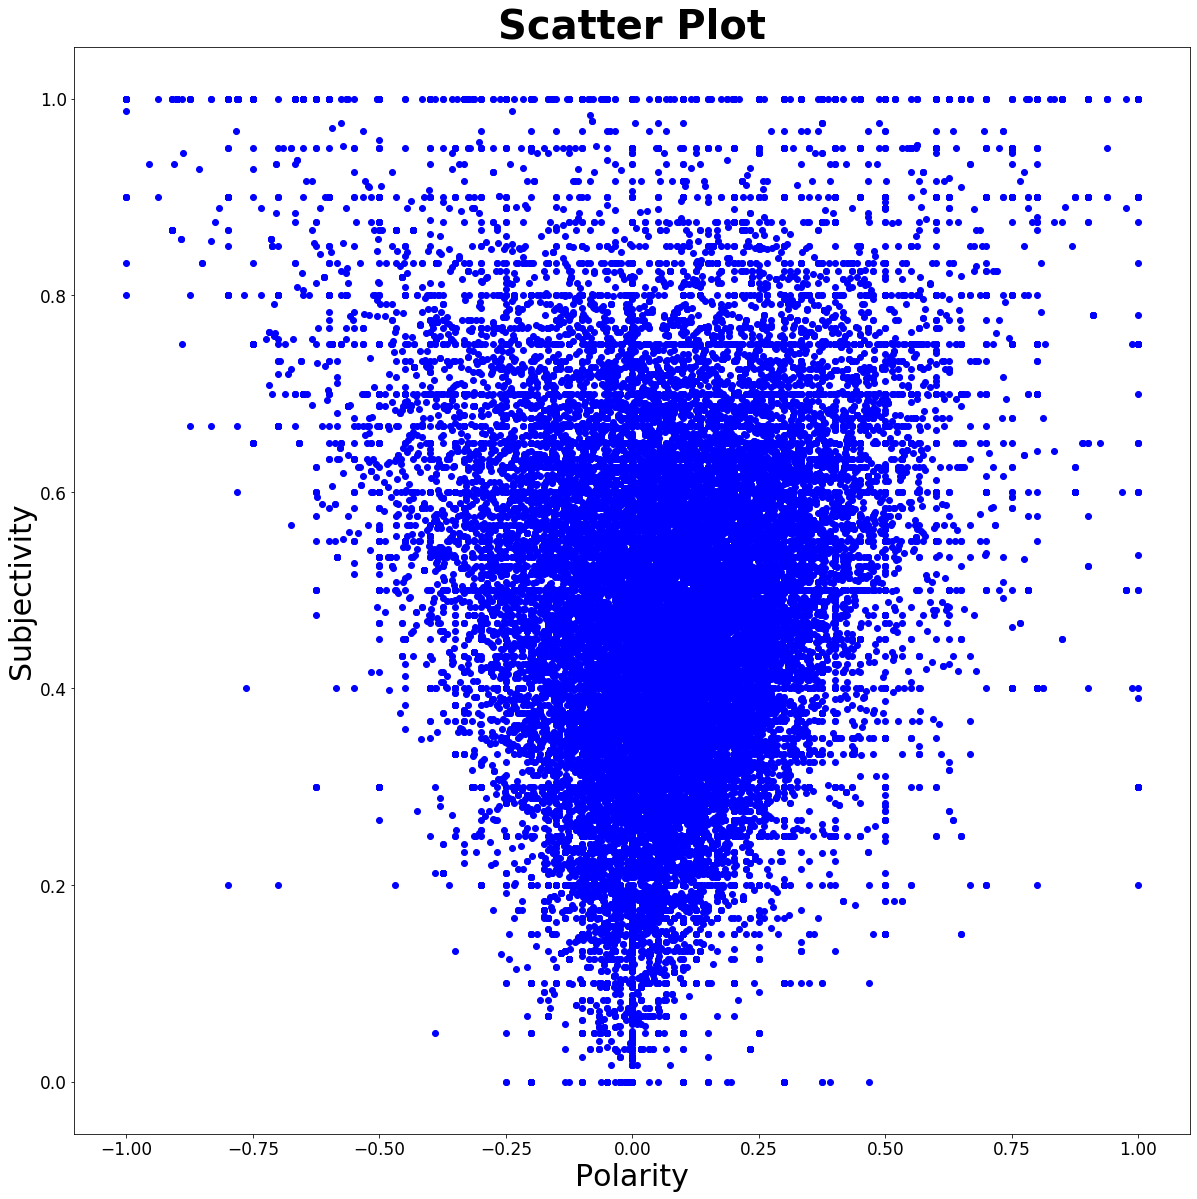

In [7]:
# Plot the polarity and subjectivity

plt.figure(figsize = (20,20))
plt.scatter(df_clean['Polarity'], df_clean['Subjectivity'], color='Blue')

plt.title('Scatter Plot',fontsize = 40,fontweight='bold')
plt.xlabel('Polarity',fontsize = 30)
plt.ylabel('Subjectivity',fontsize =30)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.savefig('Polarity vs Subjectivity (Scatter Plot)',dpi=300)
plt.show()

In [8]:
p_tweets = df_clean[df_clean['Analysis']=='Positive']
p_tweets_per = round(p_tweets.shape[0]/df_clean.shape[0] * 100, 3)

n_tweets = df_clean[df_clean['Analysis']=='Negative']
n_tweets_per = round(n_tweets.shape[0]/df_clean.shape[0] * 100, 3)

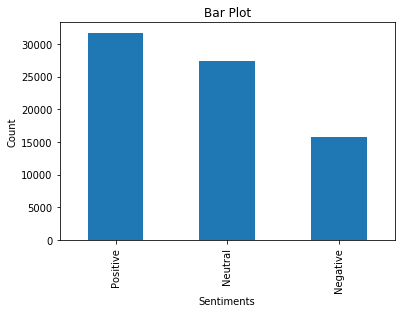

In [9]:
# Plot analysis count
plt.title('Bar Plot')
plt.xlabel('Sentiments')
plt.ylabel('Count')
df_clean['Analysis'].value_counts().plot(kind='bar')
plt.savefig('Polarity vs Subjectivity (Bar Plot)',dpi=300)
plt.show()